# Clustering Analysis using K-Means and later Multiple Correspondence Analysis with K-means output

In [299]:
# installing libs

# !pip install pandas
# !pip install numpy
# !pip install matplotlib
# !pip install seaborn
# !pip install plotly
# !pip install scipy
# !pip install scikit-learn
# !pip install pingouin
# !pip install prince
# !pip install openpyxl

In [300]:
# importing libs

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.cluster.hierarchy as sch
from scipy.stats import zscore
from scipy.spatial.distance import pdist
from scipy.stats import chi2_contingency
from sklearn.cluster import AgglomerativeClustering
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import pingouin as pg
import plotly.express as px 
import plotly.io as pio
import plotly.graph_objects as go
import prince
pio.renderers.default='browser'

In [301]:
# reading the database
## source: https://www.kaggle.com/datasets/uom190346a/e-commerce-customer-behavior-dataset
df_customer_behavior = pd.read_csv('E-commerce Customer Behavior.csv')

In [302]:
df_customer_behavior

,Customer ID,Gender,Age,City,Membership Type,Total Spend,Items Purchased,Average Rating,Discount Applied,Days Since Last Purchase,Satisfaction Level
0,101,Female,29,New York,Gold,1120.20,14,4.6,True,25,Satisfied
1,102,Male,34,Los Angeles,Silver,780.50,11,4.1,False,18,Neutral
2,103,Female,43,Chicago,Bronze,510.75,9,3.4,True,42,Unsatisfied
3,104,Male,30,San Francisco,Gold,1480.30,19,4.7,False,12,Satisfied
4,105,Male,27,Miami,Silver,720.40,13,4.0,True,55,Unsatisfied
...,...,...,...,...,...,...,...,...,...,...,...
345,446,Male,32,Miami,Silver,660.30,10,3.8,True,42,Unsatisfied
346,447,Female,36,Houston,Bronze,470.50,8,3.0,False,27,Neutral
347,448,Female,30,New York,Gold,1190.80,16,4.5,True,28,Satisfied
348,449,Male,34,Los Angeles,Silver,780.20,11,4.2,False,21,Neutral


In [303]:
df_customer_behavior.describe()

,Customer ID,Age,Total Spend,Items Purchased,Average Rating,Days Since Last Purchase
count,350.000000,350.000000,350.000000,350.000000,350.000000,350.000000
mean,275.500000,33.597143,845.381714,12.600000,4.019143,26.588571
std,101.180532,4.870882,362.058695,4.155984,0.580539,13.440813
min,101.000000,26.000000,410.800000,7.000000,3.000000,9.000000
25%,188.250000,30.000000,502.000000,9.000000,3.500000,15.000000
50%,275.500000,32.500000,775.200000,12.000000,4.100000,23.000000
75%,362.750000,37.000000,1160.600000,15.000000,4.500000,38.000000
max,450.000000,43.000000,1520.100000,21.000000,4.900000,63.000000


In [304]:
df_customer_behavior.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 350 entries, 0 to 349
Data columns (total 11 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Customer ID               350 non-null    int64  
 1   Gender                    350 non-null    object 
 2   Age                       350 non-null    int64  
 3   City                      350 non-null    object 
 4   Membership Type           350 non-null    object 
 5   Total Spend               350 non-null    float64
 6   Items Purchased           350 non-null    int64  
 7   Average Rating            350 non-null    float64
 8   Discount Applied          350 non-null    bool   
 9   Days Since Last Purchase  350 non-null    int64  
 10  Satisfaction Level        348 non-null    object 
dtypes: bool(1), float64(2), int64(4), object(4)
memory usage: 27.8+ KB


In [305]:
# null value in column Satisfaction Level
# not dropping na, since i'm not gonna use this column just yet
df_customer_behavior.isna().sum()

Customer ID                 0
Gender                      0
Age                         0
City                        0
Membership Type             0
Total Spend                 0
Items Purchased             0
Average Rating              0
Discount Applied            0
Days Since Last Purchase    0
Satisfaction Level          2
dtype: int64

In [306]:
# no duplicated rows
df_customer_behavior.duplicated().sum()

0

In [307]:
# no duplicated customers
df_customer_behavior['Customer ID'].duplicated().sum()

0

In [308]:
# keeping only quantitative data
df_customer_behavior_quant = df_customer_behavior[
    ['Age',
     'Total Spend', 
     'Items Purchased',
     'Average Rating',
     'Days Since Last Purchase'
    ]
]

In [309]:
# standartization
df_customer_behavior_std = df_customer_behavior_quant.apply(zscore, ddof=1)

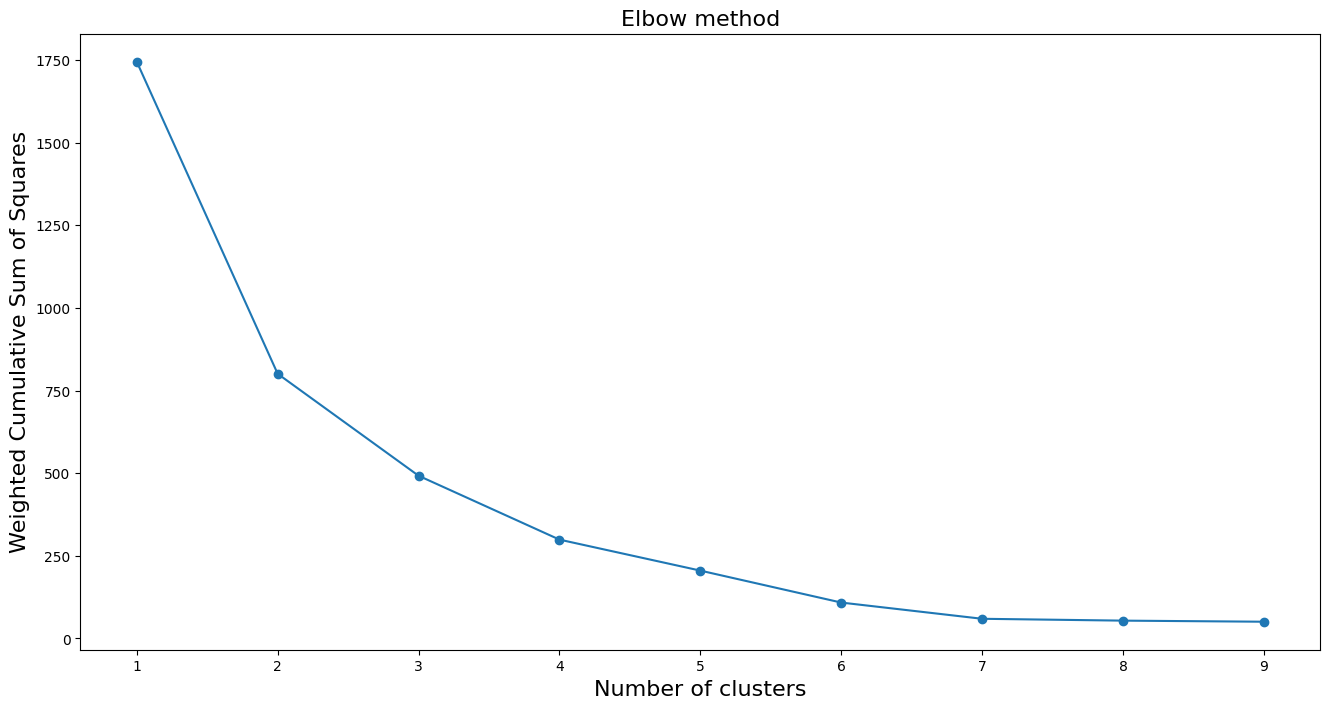

In [310]:
# identifying number of clusters using elbow method
elbow_list = []
K = range(1, 10)
for k in K:
    elbow = KMeans(n_clusters=k, init='random', random_state=100).fit(df_customer_behavior_std)
    elbow_list.append(elbow.inertia_)

plt.figure(figsize=(16, 8))
plt.plot(K, elbow_list, marker='o')
plt.xlabel('Number of clusters', fontsize=16)
plt.ylabel('Weighted Cumulative Sum of Squares', fontsize=16)
plt.title('Elbow method', fontsize=16)
plt.show()

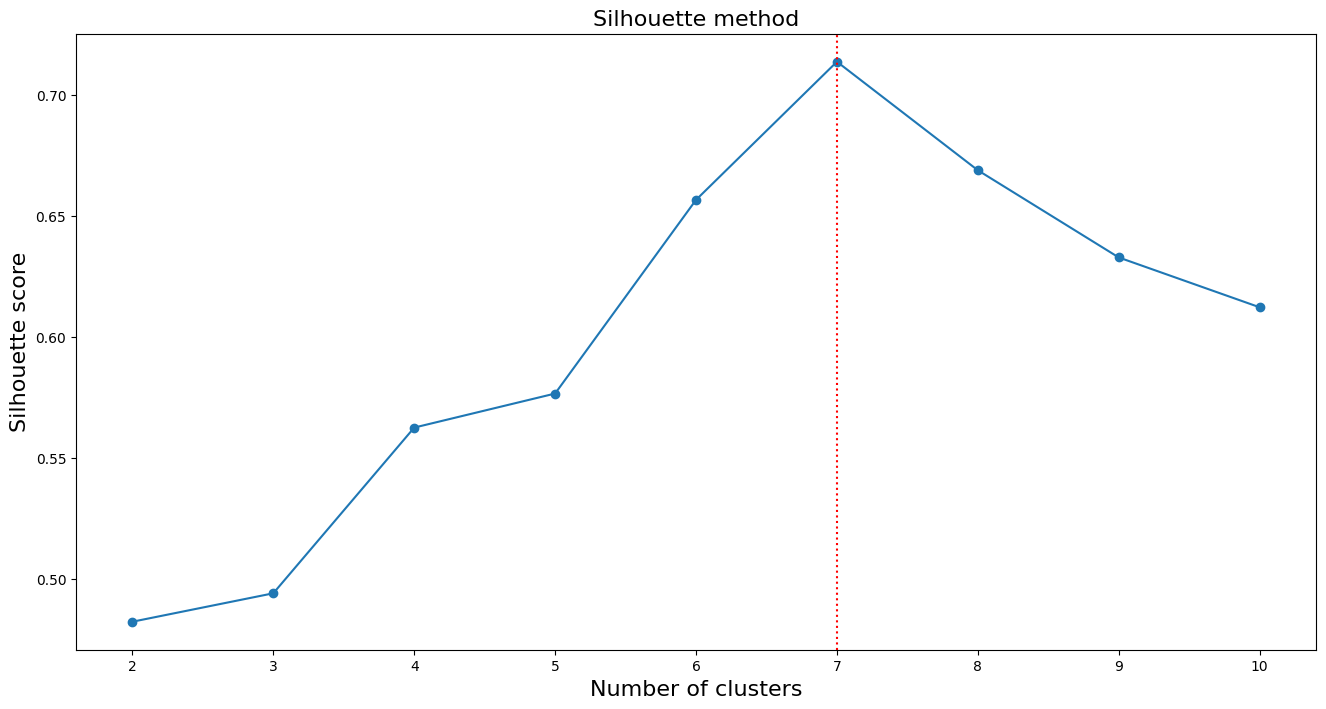

In [311]:
# identifying number of clusters using silhouette method
silhouette_list = []
I = range(2, 11)
for i in I:
    silhouette = KMeans(n_clusters=i, init='random', random_state=100).fit(df_customer_behavior_std)
    silhouette_list.append(silhouette_score(df_customer_behavior_std, silhouette.labels_))

plt.figure(figsize=(16, 8))
plt.plot(I, silhouette_list, marker='o')
plt.xlabel('Number of clusters', fontsize=16)
plt.ylabel('Silhouette score', fontsize=16)
plt.title('Silhouette method', fontsize=16)
plt.axvline(x=silhouette_list.index(max(silhouette_list))+2, linestyle='dotted', color='red')
plt.show()

In [312]:
# considering the best number of cluster, as evident previously
final_kmeans = KMeans(n_clusters=7, init='random', random_state=100).fit(df_customer_behavior_std)

# creating new variable with identified clusters
kmeans_clusters = final_kmeans.labels_
df_customer_behavior['Cluster Kmeans'] = kmeans_clusters
df_customer_behavior['Cluster Kmeans'] = df_customer_behavior['Cluster Kmeans'].astype('category')
df_customer_behavior_quant['Cluster Kmeans'] = kmeans_clusters
df_customer_behavior_quant['Cluster Kmeans'] = df_customer_behavior_quant['Cluster Kmeans'].astype('category')
df_customer_behavior_std['Cluster Kmeans'] = kmeans_clusters
df_customer_behavior_std['Cluster Kmeans'] = df_customer_behavior_std['Cluster Kmeans'].astype('category')

C:\Users\Thiago\AppData\Local\Temp\ipykernel_19260\1254206127.py:8: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

C:\Users\Thiago\AppData\Local\Temp\ipykernel_19260\1254206127.py:9: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [313]:
# ANOVA to get relevant variables (p-value less than 0.5)
aov_list = []
relevant_vars = []
for var in df_customer_behavior_std.columns[:-1]:
    aov = pg.anova(dv=var,
                   between='Cluster Kmeans',
                   data=df_customer_behavior_std)
    if aov.loc[0, 'p-unc'] < 0.5:
        relevant_vars.append(var)
print(relevant_vars)

['Age', 'Total Spend', 'Items Purchased', 'Average Rating', 'Days Since Last Purchase']


In [314]:
# identifying clusters characteristics
df_groupedby_cluster = df_customer_behavior_quant.groupby(by=['Cluster Kmeans'])
df_groupedby_cluster.describe().round(2).T

C:\Users\Thiago\AppData\Local\Temp\ipykernel_19260\2021721169.py:2: FutureWarning:

The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.



Cluster Kmeans                        0       1       2        3       4  \
Age                      count    59.00   58.00   59.00    58.00   24.00   
                         mean     30.71   42.02   34.12    29.12   32.00   
                         std       0.74    0.93    1.19     1.30    0.00   
                         min      29.00   41.00   27.00    28.00   32.00   
                         25%      30.00   41.00   34.00    28.00   32.00   
                         50%      31.00   42.00   34.00    29.00   32.00   
                         75%      31.00   43.00   35.00    30.00   32.00   
                         max      32.00   43.00   35.00    36.00   32.00   
Total Spend              count    59.00   58.00   59.00    58.00   24.00   
                         mean   1165.04  499.88  805.49  1459.77  671.55   
                         std      24.61   15.28   17.19    42.24    9.92   
                         min    1120.20  475.25  770.20  1360.20  660.30   
                         25%    1140.60  485.25  790.20  1453.00  660.30   
                         50%    1160.60  500.75  800.90  1470.50  670.30   
                         75%    1190.80  510.75  820.90  1490.10  680.30   
                         max    1210.60  530.40  830.90  1520.10  690.30   
Items Purchased          count    59.00   58.00   59.00    58.00   24.00   
                         mean     15.27    9.41   11.68    20.00   10.04   
                         std       0.76    0.50    0.71     1.08    0.20   
                         min      14.00    9.00   11.00    18.00   10.00   
                         25%      15.00    9.00   11.00    19.25   10.00   
                         50%      15.00    9.00   12.00    20.00   10.00   
                         75%      16.00   10.00   12.00    21.00   10.00   
                         max      17.00   10.00   13.00    21.00   11.00   
Average Rating           count    59.00   58.00   59.00    58.00   24.00   
                         mean      4.54    3.46    4.17     4.81    3.80   
                         std       0.11    0.14    0.11     0.10    0.00   
                         min       4.30    3.30    4.00     4.60    3.80   
                         25%       4.50    3.30    4.10     4.80    3.80   
                         50%       4.50    3.50    4.20     4.80    3.80   
                         75%       4.60    3.60    4.30     4.90    3.80   
                         max       4.80    3.60    4.40     4.90    3.80   
Days Since Last Purchase count    59.00   58.00   59.00    58.00   24.00   
                         mean     24.59   40.47   15.27    11.17   34.62   
                         std       4.50    3.29    2.24     1.59    3.16   
                         min      18.00   35.00   12.00     9.00   32.00   
                         25%      20.50   38.00   14.00    10.00   32.00   
                         50%      25.00   39.00   15.00    11.00   33.00   
                         75%      27.00   42.00   17.00    12.75   36.25   
                         max      36.00   49.00   21.00    15.00   42.00   

Cluster Kmeans                       5       6  
Age                      count   58.00   34.00  
                         mean    36.71   26.79  
                         std      0.75    0.59  
                         min     35.00   26.00  
                         25%     36.00   26.25  
                         50%     37.00   27.00  
                         75%     37.00   27.00  
                         max     38.00   29.00  
Total Spend              count   58.00   34.00  
                         mean   446.89  703.69  
                         std     17.74   11.67  
                         min    410.80  670.60  
                         25%    430.80  693.05  
                         50%    440.90  710.40  
                         75%    460.50  710.40  
                         max    480.50  730.40  
Items Purchased          count   58.00   34.00  
 

In [315]:
# 3d graphs for visualization
# first perspective
fig = px.scatter_3d(df_customer_behavior_quant,
                    x='Age',
                    y='Total Spend',
                    z='Items Purchased',
                    color='Cluster Kmeans')
fig.show()

# second perspective
fig = px.scatter_3d(df_customer_behavior_quant,
                    x='Age',
                    y='Average Rating',
                    z='Days Since Last Purchase',
                    color='Cluster Kmeans')
fig.show()

In [316]:
# renaming cluster labels based on map analysis
labels = {0: '0|Younger|MajorAccount|BetterXP|Recent',
          1: '1|Older|SmallAcount|WorseXP|Churn',
          2: '2|Older|SmallAcount|BetterXP|Recent',
          3: '3|Younger|MajorAccount|BetterXP|Recent',
          4: '4|Older|SmallAcount|WorseXP|Churn',
          5: '5|Older|SmallAcount|WorseXP|Recent',
          6: '6|Younger|SmallAcount|BetterXP|Churn'}
df_customer_behavior['Cluster Kmeans'] = df_customer_behavior['Cluster Kmeans'].replace(labels)
df_customer_behavior_quant['Cluster Kmeans'] = df_customer_behavior_quant['Cluster Kmeans'].replace(labels)
df_customer_behavior_std['Cluster Kmeans'] = df_customer_behavior_std['Cluster Kmeans'].replace(labels)

C:\Users\Thiago\AppData\Local\Temp\ipykernel_19260\1025311752.py:9: FutureWarning:

The behavior of Series.replace (and DataFrame.replace) with CategoricalDtype is deprecated. In a future version, replace will only be used for cases that preserve the categories. To change the categories, use ser.cat.rename_categories instead.

C:\Users\Thiago\AppData\Local\Temp\ipykernel_19260\1025311752.py:10: FutureWarning:

The behavior of Series.replace (and DataFrame.replace) with CategoricalDtype is deprecated. In a future version, replace will only be used for cases that preserve the categories. To change the categories, use ser.cat.rename_categories instead.

C:\Users\Thiago\AppData\Local\Temp\ipykernel_19260\1025311752.py:10: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-vi

It's safe to assume that younger people tend to enjoy more the products they bought and spend more than older people

# Using K-means output for MCA Analysis

In [317]:
# separating qualitative data
df_customer_behavior_qual = df_customer_behavior[['Gender', 'City', 'Membership Type',
                                                  'Discount Applied', 'Satisfaction Level',
                                                  'Cluster Kmeans']]
df_customer_behavior_qual

,Gender,City,Membership Type,Discount Applied,Satisfaction Level,Cluster Kmeans
0,Female,New York,Gold,True,Satisfied,0|Younger|MajorAccount|BetterXP|Recent
1,Male,Los Angeles,Silver,False,Neutral,2|Older|SmallAcount|BetterXP|Recent
2,Female,Chicago,Bronze,True,Unsatisfied,1|Older|SmallAcount|WorseXP|Churn
3,Male,San Francisco,Gold,False,Satisfied,3|Younger|MajorAccount|BetterXP|Recent
4,Male,Miami,Silver,True,Unsatisfied,6|Younger|SmallAcount|BetterXP|Churn
...,...,...,...,...,...,...
345,Male,Miami,Silver,True,Unsatisfied,4|Older|SmallAcount|WorseXP|Churn
346,Female,Houston,Bronze,False,Neutral,5|Older|SmallAcount|WorseXP|Recent
347,Female,New York,Gold,True,Satisfied,0|Younger|MajorAccount|BetterXP|Recent
348,Male,Los Angeles,Silver,False,Neutral,2|Older|SmallAcount|BetterXP|Recent


In [318]:
df_customer_behavior_qual.describe()

,Gender,City,Membership Type,Discount Applied,Satisfaction Level,Cluster Kmeans
count,350,350,350,350,348,350
unique,2,6,3,2,3,7
top,Female,New York,Gold,True,Satisfied,0|Younger|MajorAccount|BetterXP|Recent
freq,175,59,117,175,125,59


In [319]:
df_customer_behavior_qual.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 350 entries, 0 to 349
Data columns (total 6 columns):
 #   Column              Non-Null Count  Dtype   
---  ------              --------------  -----   
 0   Gender              350 non-null    object  
 1   City                350 non-null    object  
 2   Membership Type     350 non-null    object  
 3   Discount Applied    350 non-null    bool    
 4   Satisfaction Level  348 non-null    object  
 5   Cluster Kmeans      350 non-null    category
dtypes: bool(1), category(1), object(4)
memory usage: 12.1+ KB


In [320]:
df_customer_behavior_qual.isna().sum()

Gender                0
City                  0
Membership Type       0
Discount Applied      0
Satisfaction Level    2
Cluster Kmeans        0
dtype: int64

In [321]:
df_customer_behavior_qual.dropna(inplace=True)

C:\Users\Thiago\AppData\Local\Temp\ipykernel_19260\3622108291.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [322]:
# no duplicated rows
df_customer_behavior.duplicated().sum()

0

In [323]:
# frequency tables of each column
for col in df_customer_behavior_qual.columns:
    print(df_customer_behavior_qual[col].value_counts())
    print('-='*20)

Gender
Male      175
Female    173
Name: count, dtype: int64
-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=
City
New York         59
Los Angeles      59
Chicago          58
San Francisco    58
Miami            58
Houston          56
Name: count, dtype: int64
-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=
Membership Type
Gold      117
Silver    117
Bronze    114
Name: count, dtype: int64
-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=
Discount Applied
True     175
False    173
Name: count, dtype: int64
-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=
Satisfaction Level
Satisfied      125
Unsatisfied    116
Neutral        107
Name: count, dtype: int64
-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=
Cluster Kmeans
0|Younger|MajorAccount|BetterXP|Recent    59
2|Older|SmallAcount|BetterXP|Recent       59
1|Older|SmallAcount|WorseXP|Churn         58
3|Younger|MajorAccount|BetterXP|Recent    58
5|Older|SmallAcount|WorseXP|Recent        56
6|Younger|SmallAcount|BetterXP|Churn      34
4|Older|SmallAcount|WorseXP|Churn         2

In [324]:
# Chi-squared test for a pair of variables using "City" as reference
relevant_vars = []
for col in df_customer_behavior_qual.columns:
    if col != 'City':
        p_value = round(
            chi2_contingency(
                pd.crosstab(
                    df_customer_behavior_qual['City'],
                    df_customer_behavior_qual[col]
                )
            )[1], 4
        )
        print('-=' * 20)
        print(f'{col} p-value: {p_value}')
        if p_value < 0.5:
            relevant_vars.append(col)

-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=
Gender p-value: 0.0
-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=
Membership Type p-value: 0.0
-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=
Discount Applied p-value: 0.0
-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=
Satisfaction Level p-value: 0.0
-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=
Cluster Kmeans p-value: 0.0


In [325]:
# selecting only relevant variables for MCA analysis
df_customer_behavior_mca = df_customer_behavior_qual[relevant_vars]
df_customer_behavior_mca

,Gender,Membership Type,Discount Applied,Satisfaction Level,Cluster Kmeans
0,Female,Gold,True,Satisfied,0|Younger|MajorAccount|BetterXP|Recent
1,Male,Silver,False,Neutral,2|Older|SmallAcount|BetterXP|Recent
2,Female,Bronze,True,Unsatisfied,1|Older|SmallAcount|WorseXP|Churn
3,Male,Gold,False,Satisfied,3|Younger|MajorAccount|BetterXP|Recent
4,Male,Silver,True,Unsatisfied,6|Younger|SmallAcount|BetterXP|Churn
...,...,...,...,...,...
345,Male,Silver,True,Unsatisfied,4|Older|SmallAcount|WorseXP|Churn
346,Female,Bronze,False,Neutral,5|Older|SmallAcount|WorseXP|Recent
347,Female,Gold,True,Satisfied,0|Younger|MajorAccount|BetterXP|Recent
348,Male,Silver,False,Neutral,2|Older|SmallAcount|BetterXP|Recent


In [326]:
# creating coordinates for 3 dimensions perceptual map and checking viability later
num_components = 3
mca = prince.MCA(n_components=num_components).fit(df_customer_behavior_mca)

In [327]:
# eigen values
eigen_values_summary = mca.eigenvalues_summary
print(eigen_values_summary)

          eigenvalue % of variance % of variance (cumulative)
component                                                    
0              0.605        25.21%                     25.21%
1              0.579        24.12%                     49.33%
2              0.532        22.15%                     71.48%


In [328]:
# plotting only dimensions where partial inertia is greater than average total inertia
dim_quant = mca.J_ - mca.K_
avg_total_inertia = mca.total_inertia_/dim_quant
print(f'avg_total_inertia: {avg_total_inertia}')

avg_total_inertia: 0.20000000000000293


In [329]:
counter = 0
for eigen_value in eigen_values_summary['eigenvalue']:
    if float(eigen_value) > avg_total_inertia:
        print(f'{eigen_value} is greater than {avg_total_inertia}')
        counter+=1
    else:
        print(f'{eigen_value} is NOT greater than {avg_total_inertia}')

if counter == num_components:
    print('All dimensions are good to be used')
else:
    print("One of the dimensions shoudn't be used")

0.605 is greater than 0.20000000000000293
0.579 is greater than 0.20000000000000293
0.532 is greater than 0.20000000000000293
All dimensions are good to be used


In [330]:
# getting standard coordinates of variables category
coords = mca.column_coordinates(df_customer_behavior_mca)/np.sqrt(mca.eigenvalues_)
print(coords)

                                                           0         1  \
Gender__Female                                      0.862800  0.541045   
Gender__Male                                       -0.852939 -0.534861   
Membership Type__Bronze                             1.393252 -0.256455   
Membership Type__Gold                              -0.997999  1.522993   
Membership Type__Silver                            -0.359529 -1.273113   
Discount Applied__False                            -0.807618 -0.610623   
Discount Applied__True                              0.798388  0.603644   
Satisfaction Level__Neutral                        -0.216554 -1.410593   
Satisfaction Level__Satisfied                      -1.023011  1.361844   
Satisfaction Level__Unsatisfied                     1.302135 -0.166354   
Cluster Kmeans__0|Younger|MajorAccount|BetterXP... -0.192030  2.117539   
Cluster Kmeans__1|Older|SmallAcount|WorseXP|Churn   2.151164  0.381076   
Cluster Kmeans__2|Older|SmallAcount|Be

In [331]:
# first step to plot perceptual map: create a detailed dataframe
chart = coords.reset_index()
var_chart = pd.Series(chart['index'].str.split('_', expand=True).iloc[:,0])
categ_name = []
for col in df_customer_behavior_mca:
    categ_name.append(df_customer_behavior_mca[col].sort_values(ascending=True).unique())
    categories = pd.DataFrame(categ_name).stack().reset_index()

df_chart_mca = pd.DataFrame({'category': chart['index'],
                             'obs_x': chart[0],
                             'obs_y': chart[1],
                             'obs_z': chart[2],
                             'variable': var_chart,
                             'category_id': categories[0]})
df_chart_mca

,category,obs_x,obs_y,obs_z,variable,category_id
0,Gender__Female,0.862800,0.541045,-0.772940,Gender,Female
1,Gender__Male,-0.852939,-0.534861,0.764107,Gender,Male
2,Membership Type__Bronze,1.393252,-0.256455,-1.134309,Membership Type,Bronze
3,Membership Type__Gold,-0.997999,1.522993,-0.117610,Membership Type,Gold
4,Membership Type__Silver,-0.359529,-1.273113,1.222833,Membership Type,Silver
5,Discount Applied__False,-0.807618,-0.610623,-0.793344,Discount Applied,False
6,Discount Applied__True,0.798388,0.603644,0.784277,Discount Applied,True
7,Satisfaction Level__Neutral,-0.216554,-1.410593,-1.241100,Satisfaction Level,Neutral
8,Satisfaction Level__Satisfied,-1.023011,1.361844,-0.081714,Satisfaction Level,Satisfied
9,Satisfaction Level__Unsatisfied,1.302135,-0.166354,1.232862,Satisfaction Level,Unsatisfied


In [332]:
# second and final step: plot the map
fig = px.scatter_3d(df_chart_mca, 
                    x='obs_x', 
                    y='obs_y', 
                    z='obs_z',
                    color='variable',
                    text=df_chart_mca['category_id'])
fig.show()

With MCA addition, we can see that major accounts, which is composed by younger people, are very satisfied and have gold membership.\
On the other hand, small accounts, composed by older people in majority, lean towards neutral or unsatisfied.\
Gender and discounts doesn't seem to be directly related to anything, however it's possible to notice that male is more likely to have silver membership, while female will probably subscribe to bronze membership.\

In conclusion, the e-commerce is doing a great job for younger people, bringing great revenue and being the major accounts.\
The e-commerce should try to engage their older customers with different strategies.